# Breast Cancer Survival

### Libraries Importing

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import joblib

### Dataset Importing

In [2]:
df = pd.read_csv('BRCA.csv')
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


### Data Cleaning

In [3]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [4]:
df.shape

(341, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [6]:
df['Patient_Status'].unique()

array(['Alive', 'Dead', nan], dtype=object)

#### Obesrvations:
- Our data set consist of 341 rows, and 16 columns; 11 object, and 5 float.
- `Patient_Status` is our target column with values (Dead, Alive)
- We have missing values in all columns, so we have to fix that.
- `Patient_ID` column will not contribute in our model training process so we can drop it.
- `Date_of_Surgery`, and `Date_of_Last_Visit` Data types need to be converted from `Object` to `Date`.

#### Handling Missing Values

In [7]:
df.isna().sum()/len(df)

Patient_ID            0.020528
Age                   0.020528
Gender                0.020528
Protein1              0.020528
Protein2              0.020528
Protein3              0.020528
Protein4              0.020528
Tumour_Stage          0.020528
Histology             0.020528
ER status             0.020528
PR status             0.020528
HER2 status           0.020528
Surgery_type          0.020528
Date_of_Surgery       0.020528
Date_of_Last_Visit    0.070381
Patient_Status        0.058651
dtype: float64

* The missing values is less than 5% so we can drop them.

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

#### Check Dataset for Duplicates

In [10]:
df.duplicated().sum()

0

In [11]:
#drop columns that will not provide important info
df.drop(columns = ['Patient_ID','Date_of_Surgery','Date_of_Last_Visit'],inplace=True)
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead


### EDA

#### Checking Target Balance

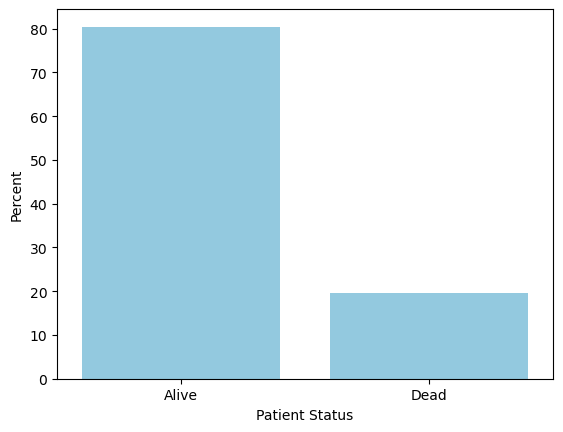

In [12]:
sns.countplot(data = df, x= 'Patient_Status', stat='percent',color='skyblue')
plt.xlabel('Patient Status')  
plt.ylabel('Percent');

- Based on the chart above, it is evident that the target variable is imbalanced, with a significantly higher proportion of patients marked as "Alive" (80%) compared to "Dead" (20%).
- To address this imbalance, we will apply techniques like oversampling after splitting the data into training and testing sets.

#### Gender Distribution

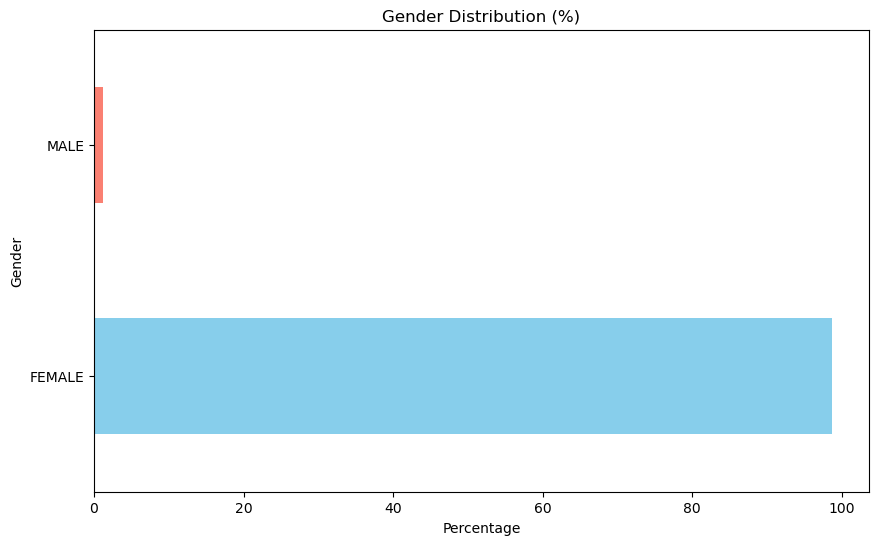

In [13]:
gender_percent = df['Gender'].value_counts(normalize=True)*100
plt.figure(figsize=(10, 6))
gender_percent.plot(kind = 'barh',color=['skyblue', 'salmon'])
plt.title('Gender Distribution (%)')
plt.xlabel('Percentage')
plt.ylabel('Gender');

- The majority of patients are females, which aligns with expectations, as breast cancer mostly affects females.

#### Check values for ER, PR, HER2 status

In [14]:
print(df['ER status'].value_counts())
print(df['HER2 status'].value_counts())
print(df['PR status'].value_counts())

ER status
Positive    317
Name: count, dtype: int64
HER2 status
Negative    288
Positive     29
Name: count, dtype: int64
PR status
Positive    317
Name: count, dtype: int64


- `ER status`, and `PR status` both have the same value: 317 labeled as positive
- Since these 2 columns have no variability, we should consider dropping them as they will not contribute in the model learning process.

In [15]:
# drop ER and PR columns

df.drop(columns=['ER status', 'PR status'], inplace=True)
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


#### Count the occurance of each Tumor Stage

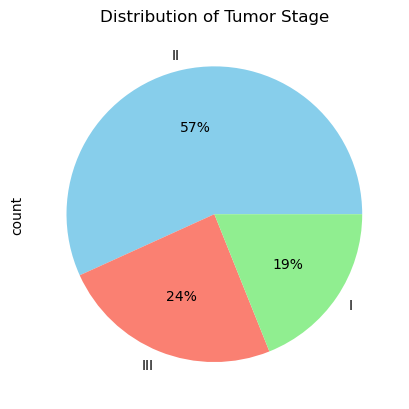

In [16]:
t_stage = df['Tumour_Stage'].value_counts()
t_stage.plot(kind = 'pie', autopct='%1.0f%%', colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Tumor Stage');


#### Surgery Type Distribution

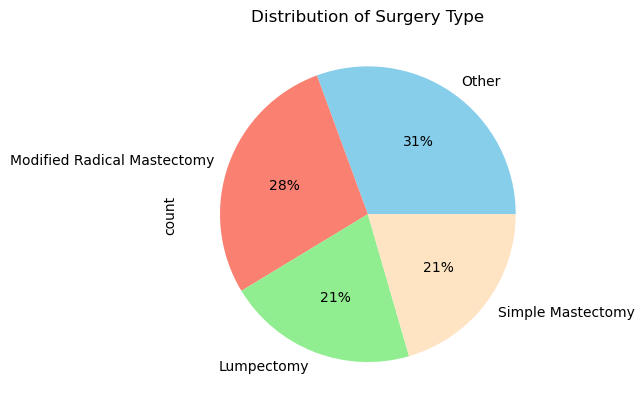

In [17]:
sur_type = df['Surgery_type'].value_counts()
sur_type.plot(kind = 'pie', autopct='%1.0f%%', colors=['skyblue', 'salmon', 'lightgreen','bisque'] )
plt.title('Distribution of Surgery Type');


#### Patients' Age Distribution

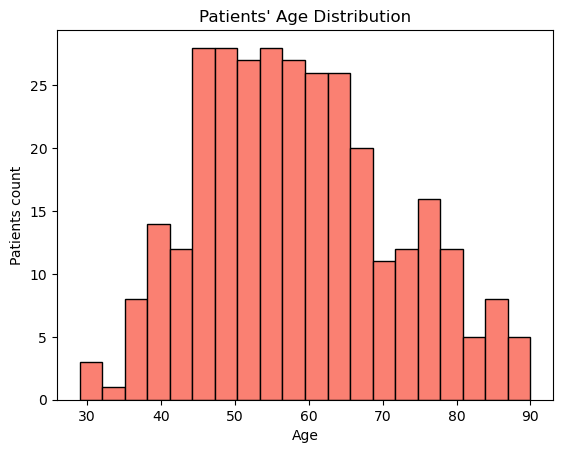

In [18]:
plt.hist(df['Age'],bins=20, color='salmon',edgecolor = 'black')
plt.title("Patients' Age Distribution")
plt.xlabel('Age')
plt.ylabel('Patients count');

#### Observations

- Age approximately ranges from 30 to 90 years covering wide spectrum
- The majority of the patients are concentrated in the age range 45-65 years (The most affected age)

#### checking the corrolation among the features

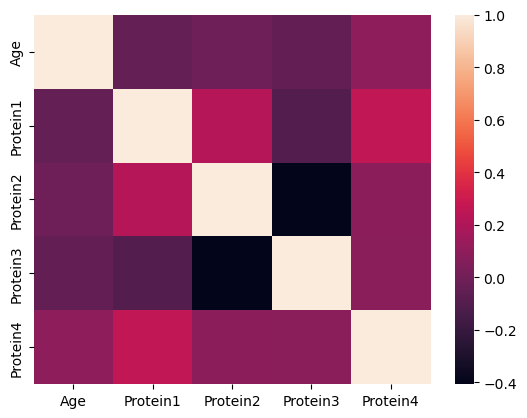

In [19]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr);

### Encoding categorical variables

In [20]:
df["Tumour_Stage"] = df["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
df["Histology"] = df["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
df["HER2 status"] = df["HER2 status"].map({"Positive": 1, "Negative": 2})
df["Gender"] = df["Gender"].map({"MALE": 0, "FEMALE": 1})
df["Surgery_type"] = df["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})
print(df.head())

    Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0  36.0       1  0.080353   0.42638   0.54715  0.273680             3   
1  43.0       1 -0.420320   0.57807   0.61447 -0.031505             2   
2  69.0       1  0.213980   1.31140  -0.32747 -0.234260             3   
3  56.0       1  0.345090  -0.21147  -0.19304  0.124270             2   
4  56.0       1  0.221550   1.90680   0.52045 -0.311990             2   

   Histology  HER2 status  Surgery_type Patient_Status  
0          1            2             2          Alive  
1          3            2             3           Dead  
2          1            2             1          Alive  
3          1            2             2          Alive  
4          1            2             1           Dead  


In [22]:
#Encoding the target using LabelEncoder
label = LabelEncoder()
df['Patient_Status'] = label.fit_transform(df['Patient_Status'])

0    0
1    1
2    0
3    0
4    1
Name: Patient_Status, dtype: int32

### Splitting the dataset

In [25]:
# split the data to target and features
y = df['Patient_Status']
X = df.drop(columns=['Patient_Status'])
print(y.shape)
print(X.shape)

(317,)
(317, 10)


In [26]:
# split the data the train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y )#using stratify paramter becasuse of the imbalanced target
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(253, 10)
(64, 10)
(253,)
(64,)


### Data Augmentation

We still need to handle the imbalance in the target values, so, we gonna use SMOTE for oversampling. it needs to be done after the data spliting to prevent data leakage.
Smote can't handle Datetime columns, so we will need to drop them first.

In [27]:
smote = SMOTE(random_state=42)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)

In [28]:
#check the proportion of each value in the target after the resampling
y_train_resampled.value_counts(normalize=True)*100

Patient_Status
0    50.0
1    50.0
Name: proportion, dtype: float64

## Model Building

As we are targeting building a binary classification model (alive/dead), we can consider using Logistic regression algorithm.
Logistic Regression is very helpful when it comes to providing a explainable results through feature coefficients.

In [30]:
#Instantiate the model
lg_model  = LogisticRegression(max_iter=1000,random_state=42)
#Train the model
lg_model.fit(X_train_resampled,y_train_resampled)
# Predict 
y_pred = lg_model.predict(X_test)


#### Model Evaluation

In [40]:
#accuracy score
lg_model.score(X_test,y_test)

0.6875

In [37]:
#confusion metrix
confusion_matrix(y_test,y_pred)

array([[40, 11],
       [ 9,  4]], dtype=int64)

In [39]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        51
           1       0.27      0.31      0.29        13

    accuracy                           0.69        64
   macro avg       0.54      0.55      0.54        64
weighted avg       0.70      0.69      0.70        64



#### Key Findings
- The logistic regression model was able to predict 68.75% of the samples correctly
- According to the confusion matrix, and classification report result, the model shows bias toward the majority class (class 0/Alive). This could be due to:
    1. The features used in the model might not have strong predictive power for class 1.
    2. Logistic regression is a linear model and might not capture non-linear relationships in the data. If the relationship between features and the target is complex, other models might perform better.

#### Feature importance

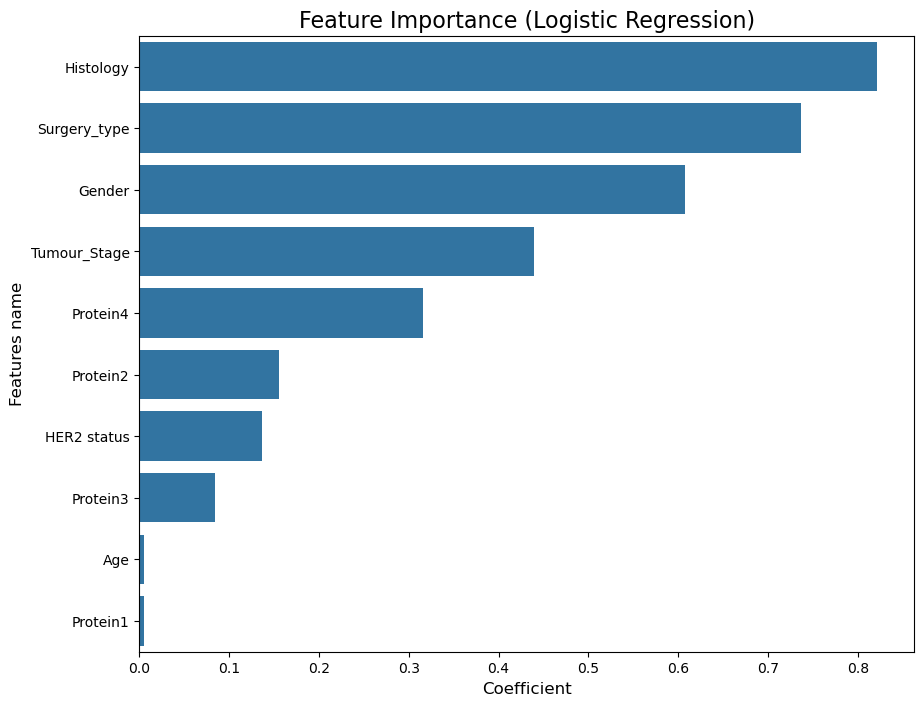

In [35]:
feature_importance = np.abs(lg_model.coef_[0])
feature_name = X_train_resampled.columns
feat_imp_df = pd.DataFrame({'feature_name':feature_name,'feature_importance':feature_importance}).sort_values(by='feature_importance', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x='feature_importance',y='feature_name',data=feat_imp_df,)
plt.title('Feature Importance (Logistic Regression)', fontsize=16)
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Features name', fontsize=12);

In [42]:
#Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)

## Model Evaluation

In [43]:
rf_model.score(X_test,y_test)

0.734375

In [44]:
confusion_matrix(y_test,y_pred_rf)

array([[45,  6],
       [11,  2]], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        51
           1       0.25      0.15      0.19        13

    accuracy                           0.73        64
   macro avg       0.53      0.52      0.52        64
weighted avg       0.69      0.73      0.71        64



#### Hyperparameter Tuning

In [56]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [57]:
grid_search.best_score_

0.8104054105802362

In [58]:
y_pred_best = best_rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        51
           1       0.33      0.23      0.27        13

    accuracy                           0.75        64
   macro avg       0.58      0.56      0.56        64
weighted avg       0.72      0.75      0.73        64

Confusion Matrix:
 [[45  6]
 [10  3]]


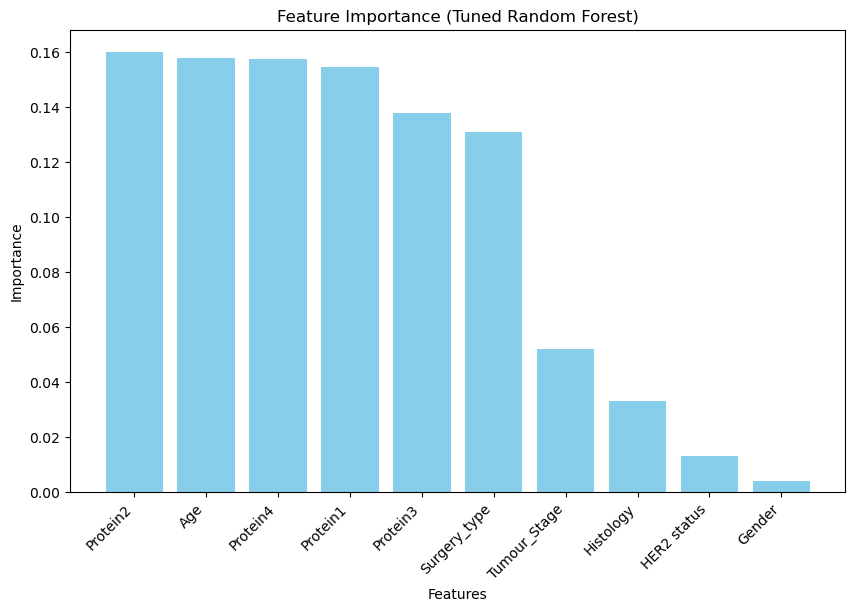

In [53]:
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': best_rf_model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Feature Importance (Tuned Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

The random forest model has a better performance than Logistic regression, However with this score, it's not relaible enough.

#### Model Deplyment

In [60]:
joblib.dump(best_rf_model, 'tuned_random_forest.pkl')


['tuned_random_forest.pkl']